# TMA4320 Introduksjon til vitenskapelige beregninger
## Øving 1

**Veiledning**: Onsdag 16:15-18:00 i R50, Realfagsbygget og torsdag 14:15-16:00 i rom 256 SB1.  
**Innlevering**: Mandag 23.01 kl. 23:59, i [ovsys](https://ovsys.math.ntnu.no).

Oppgaven skal innleveres som et Jupyternotat. Men gjør gjerne implementering og koding i Spyder eller et annet IDE, og kopier den ferdige koden inn i Jupyternotatet for innlevering.

**NB!** Før innlevering: 
* Kjør en runde på hele notatet for å se at alt virker: <tt>Kernel -> Restart & Run All</tt>
* Deretter: <tt>Kernel -> Restart & Clear Output</tt>. Fila er nå klar for innlevering. 

### Oppgave 1 (Feilsøking og retting. Dokumentasjon).

I denne oppgaven skal du beregne tilnærmelser til integraler ved hjelp av [Simpsons metode](https://wiki.math.ntnu.no/tma4100/tema/numerics?&#numerisk_integrasjon)

\begin{equation}
\int_a^b f(x)\mathrm{d}x \simeq S_{n} = \frac{h}{3}\left( f(x_0)+4\sum_{i=1}^{n/2}f(x_{2i-1}) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + f(x_{n}) \right)
\end{equation}
der $h=(b-a)/n$, der $n$ må være et like tall, og $x_i=a+ih$.

Under er det et forslag til en kode, skrevet etter prinsippet raskt og gæli. Oppgaven går ut på: 

* Debug koden, både for syntaksfeil og logiske feil. Kan den forbedres på andre måter?
* Skriv den om til en funksjon. Test funksjonen på et passende utvalg med testproblemer. 
* Dokumenter koden. 

Forslag til testproblemer med kjent løsning.

1. $\int_1^2 x^2\mathrm{d}x = 7/3$. I dette tilfellet skal Simpsons formel levere et eksakt resultat. (Hvorfor?)
2. $\int_0^{\pi/2} \sin{x} \mathrm{d}x = 1$. 

Finn gjerne på noen egne testproblemer også. 

**Hint**
* Er det problemer med logiske feil, sett $n=2$, utfør regningene på papir, og sammenlign med hva som skjer i koden. 
* Flytt koden over til Spyder eller en annen IDE, og debug koden der. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
# Debugging av gitt kode:

def f(x):
    return x ** 2
a = 1
b = 2

n = 4
h = (b-a)/n
S = f(a)

for i in range(1,int(n/2)+1):
    x = a+(2*i-1)*h
    S = S + 4*f(x)
for i in range(1, int(n/2)):
    x = a+2*i*h
    S = S + 2*f(x)
S = S + f(b)
S = h*S/3

print(S)

2.3333333333333335


In [3]:
def simpson(f, a, b, n=4):
    """
    Implementation of Simpsons method of function f from a to b.

    Parameters
    ----------
    f : callable
        Function f(x) -> R
    a : float
        Lower integration boundary
    b : float
        Upper integration boundary
    n : float
        Approximation order. Default 4. Needs to be even!

    Returns
    -------
    float
        Integration approximation
    """
    assert n % 2 == 0, 'n needs to be even'

    h = (b - a) / n
    s = f(a)

    for i in range(1, int(n/2)+1):
        x = a + (2 * i - 1) * h
        s += 4 * f(x)

    for i in range(1, int(n/2)):
        x = a + 2 * i * h
        s += 2 * f(x)

    s += f(b)

    return s * h / 3

In [4]:
# Eksempel 1
def test_simpson_polynomial():
    result = simpson(f=lambda x: x ** 2, a=1, b=2, n=2)
    analytic_result = 7. / 3.
    assert np.abs(result - analytic_result) < 1e-5, 'Result not correct to relative error 1e-5.'

test_simpson_polynomial()

In [5]:
# Eksempel 2
def test_simpson_sin():
    result = simpson(np.sin, a=0, b=np.pi/2, n=10)
    analytic_result = 1.
    assert np.abs(result - analytic_result) < 1e-5, 'Result not correct to relative error 1e-5.'

test_simpson_sin()

### Oppgave 2 (Numpy)

Implementer Simpsons metode igjen, men denne gangen ved bruk av numpy. For eksempel ved: 
* Lag et array av gridpunktene $\{x_i\}_{i=0}^n$ ved bruk av <tt>np.linspace</tt>
* For de to summene i uttrykket for Simpson's metode: Plukk ut de riktige gridpunktene $x_i$, finn funksjonsverdien av disse, og bruk <tt>np.sum</tt>. 
* Legg til funksjonsverdiene i de to endepunktene, multipliser med $h/3$.  

In [6]:
def simpson_numpy(f, a, b, n=4):
    """
    Implementation of Simpsons method of function f from a to b.

    Parameters
    ----------
    f : callable
        Function f(x) -> R
    a : float
        Lower integration boundary
    b : float
        Upper integration boundary
    n : float
        Approximation order. Default 4. Needs to be even!

    Returns
    -------
    float
        Integration approximation
    """
    assert n % 2 == 0, 'n needs to be even'

    x = np.linspace(a, b, n+1)
    fx = f(x)

    return (b - a) * (
        fx[0]
        + 4 * np.sum(fx[1:n:2])
        + 2 * np.sum(fx[2:n-1:2])
        + fx[-1]
    ) / (3 * n)

In [7]:
# Eksempel 1 med numpy
def test_simpson_polynomial_numpy():
    result = simpson_numpy(f=lambda x: x ** 2, a=1, b=2, n=2)
    analytic_result = 7. / 3.
    assert np.abs(result - analytic_result) < 1e-5, 'Result not correct to relative error 1e-5.'

test_simpson_polynomial_numpy()

In [8]:
# Eksempel 2 med numpy
def test_simpson_sin_numpy():
    result = simpson_numpy(np.sin, a=0, b=np.pi/2., n=10)
    analytic_result = 1.
    assert np.abs(result - analytic_result) < 1e-5, 'Result not correct to relative error 1e-5.'

test_simpson_sin_numpy()

### Oppgave 3 (Bruk av biblioteksrutiner)
Gitt funksjonen
\begin{equation}
f(x) = \frac{1}{(x-5)^2+0.2} + \frac{1}{(x-2)^2+0.05} + 2.
\end{equation}

* Plot funksjonen over intervallet $[-2,8]$.
* Finn en tilnærmelse til integralet $\int_{-2}^8f(x)\mathrm{d}x$ ved bruk av <tt>scipy.integrate.quad</tt>.  
  
  **Hint!** Les dokumentasjonen. Bla fram til eksemplene.

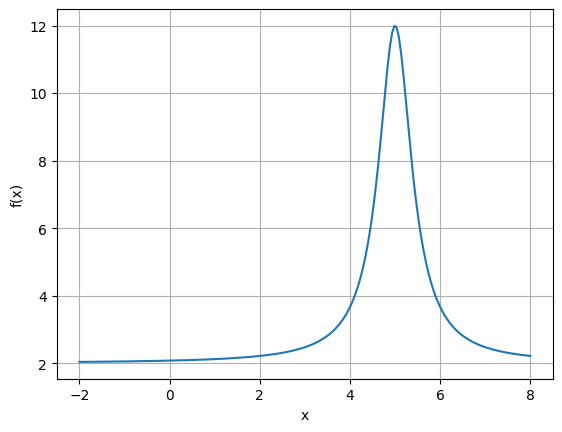

In [9]:
def f(x):
    e1 = 1 / ((x - 5) ** 2 + 0.2)
    e2 = 1 / ((x - 2) ** 2 + 0.05)
    return e1 + e1 + 2

x = np.linspace(-2, 8, 200)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

In [10]:
integral = quad(f, -2, 8)
print(f'Integral approximation [-2, 8]: {integral[0]:.2f}')

Integral approximation [-2, 8]: 33.10
